In [1]:
#1. Initial Data Inspection and Cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('rolling_stones_spotify.csv')

# Display basic information
print(data.info())
print(data.describe())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(f"Duplicates: {data.duplicated().sum()}")

# Dropping duplicates if any
data.drop_duplicates(inplace=True)

# Handling missing values if any
data = data.dropna()  # or you can fill with mean/median for numerical data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


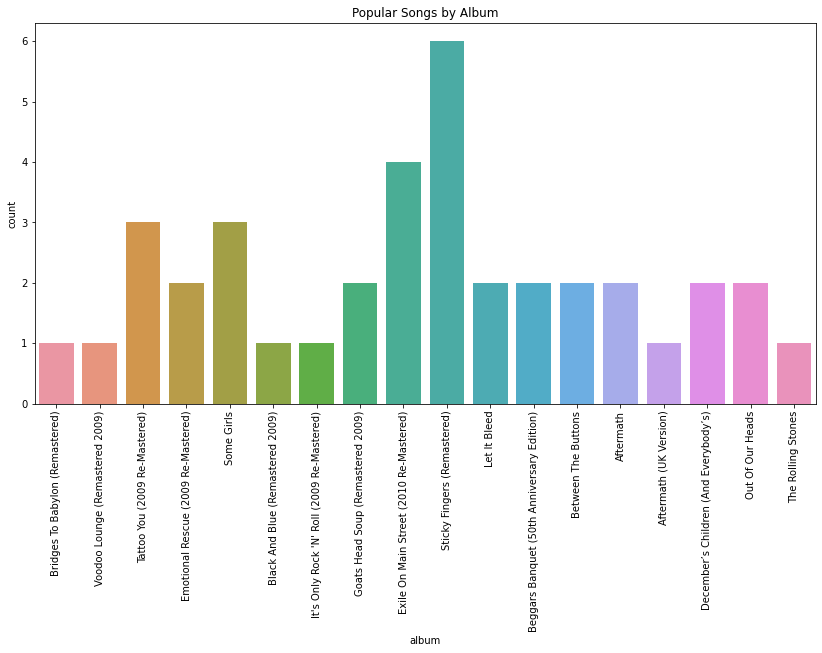

In [2]:
#2Exploratory Data Analysis
#2a. Visualizations to Identify Popular Albums
# Plot number of popular songs by album
plt.figure(figsize=(14, 7))
sns.countplot(x='album', data=data[data['popularity'] > 50])
plt.xticks(rotation=90)
plt.title('Popular Songs by Album')
plt.show()

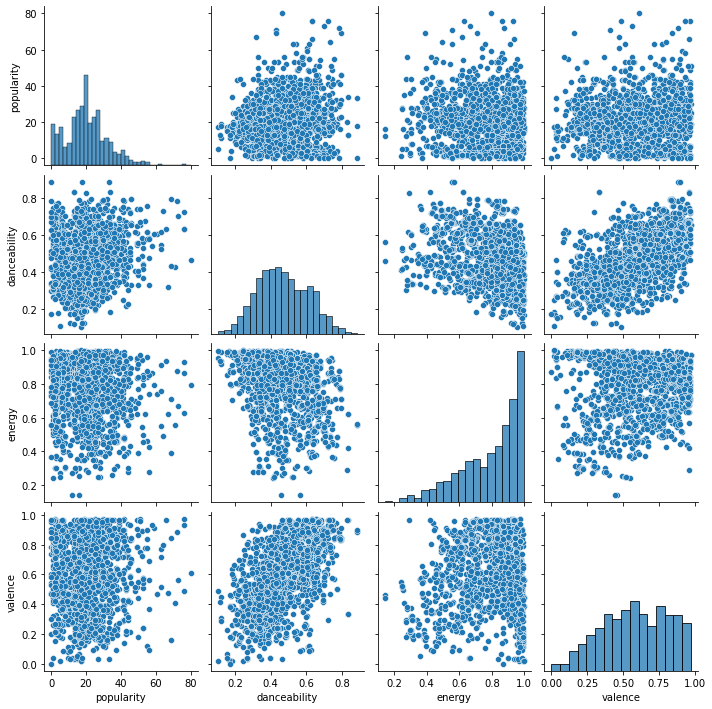

/tmp/ipykernel_171/3921575545.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


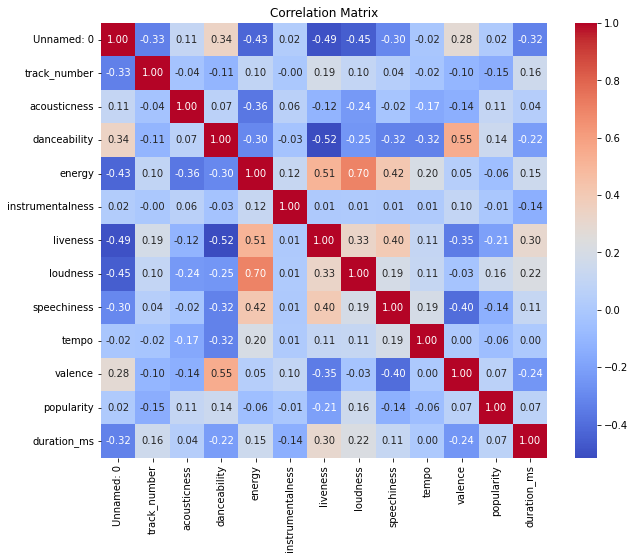

In [3]:
#2b. Explore Features of Songs
# Pairplot to explore relationships between features
sns.pairplot(data[['popularity', 'danceability', 'energy', 'valence']])
plt.show()

# Correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

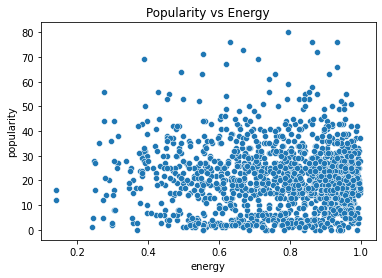

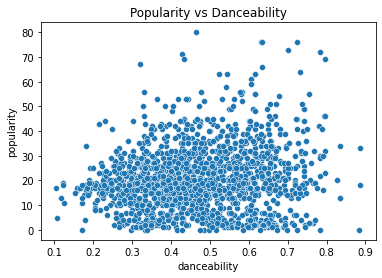

In [4]:
#2c. Relationship Between Popularity and Other Factors
# Relationship between popularity and energy
sns.scatterplot(x='energy', y='popularity', data=data)
plt.title('Popularity vs Energy')
plt.show()

# Relationship between popularity and danceability
sns.scatterplot(x='danceability', y='popularity', data=data)
plt.title('Popularity vs Danceability')
plt.show()


In [5]:
#2d. Dimensionality Reduction Insights

from sklearn.decomposition import PCA

# Selecting numerical features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']
X = data[features]

# Standardizing the features
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# PCA to reduce dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.30326096 0.16514826]


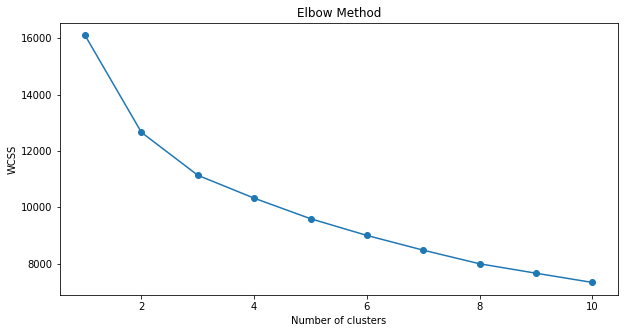

In [6]:
#3 Cluster Analysis
#3a. Identifying the Right Number of Clusters
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

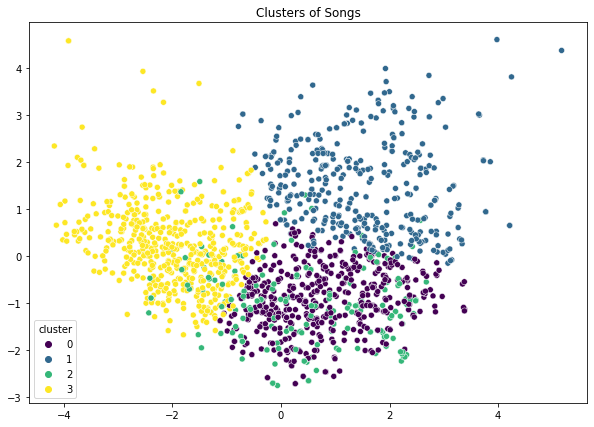

In [7]:
#3b. Applying Clustering Algorithm

# Apply KMeans clustering with the optimal number of clusters
optimal_clusters = 4  # Example number, decide based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Clusters of Songs')
plt.show()

In [8]:
#3c. Defining Each Cluster
# Understanding the clusters by their centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features)

# Display cluster characteristics
print(centroid_df)

   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0     -0.405372      0.593579  0.102992         -0.387503 -0.563825  0.097290   
1      0.902467      0.160624 -1.296503         -0.319904 -0.567377 -0.948193   
2     -0.008751      0.269176  0.220728          2.128600 -0.205076  0.066867   
3     -0.249795     -0.776653  0.736824         -0.194288  1.012152  0.553038   

   speechiness     tempo   valence  duration_ms  
0    -0.370347 -0.069649  0.779300    -0.257232  
1    -0.438652 -0.438288 -0.491420    -0.122940  
2    -0.276661 -0.008237  0.608985    -0.515529  
3     0.764023  0.378932 -0.617937     0.521968  
